In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('scores.csv')
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [3]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [13]:
X = df['TotalHours'].values.reshape(-1, 1)
Y = df['CapstoneScore'].values

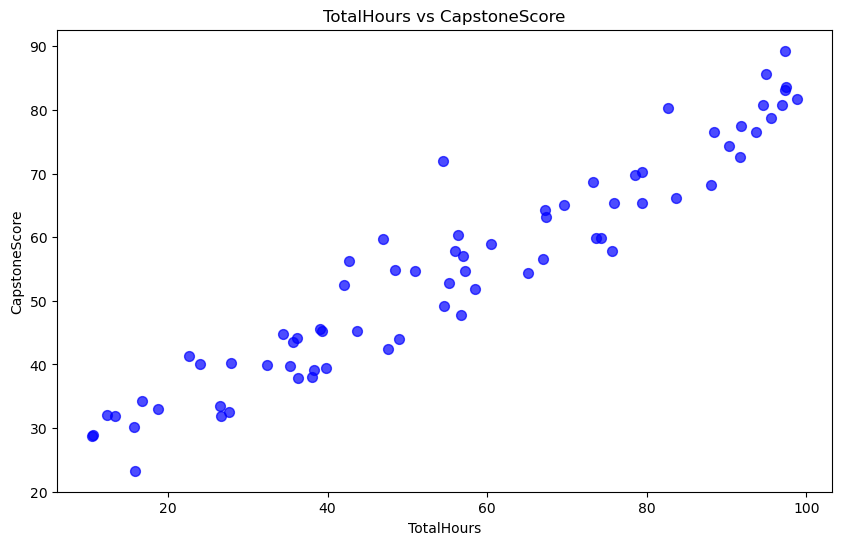

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.7 , color='blue', s=50)
plt.xlabel('TotalHours')
plt.ylabel('CapstoneScore')
plt.title('TotalHours vs CapstoneScore')
plt.show()

In [52]:
""" 
X : Input feature (TotalHours)
Y : Target variable (CapstoneScore)

X : (m,n)
Y : (m,1)
beta : (beta0 , beta1)

X.dot(beta) = beta0 + beta1*X1 + beta2*X2 + ... + betan*Xn
"""

def compute_cost(X, Y, beta):
    m = len(Y)
    Y_pred = X.dot(beta)
    cost = (1/(2*m)) * np.sum((Y_pred - Y)**2)
    return cost

def gradient_descent(X, Y, beta, learning_rate, iterations):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        Y_pred = X.dot(beta)
        beta = beta - (1/m) * learning_rate * (X.T.dot((Y_pred - Y)))
        cost_history[it] = compute_cost(X, Y, beta)

    return beta, cost_history


In [53]:
beta = np.random.randn(2)
print(beta)

[-0.84222928  1.47175834]


In [54]:
learning_rate = 0.000001
iterations = 100000

In [55]:
X_with_bias = np.column_stack([np.ones((len(X))),X])
X_with_bias

array([[ 1. , 43.7],
       [ 1. , 95.6],
       [ 1. , 75.9],
       [ 1. , 24. ],
       [ 1. , 88. ],
       [ 1. , 97.3],
       [ 1. , 26.5],
       [ 1. , 57.2],
       [ 1. , 48.9],
       [ 1. , 36.2],
       [ 1. , 65.1],
       [ 1. , 22.6],
       [ 1. , 36.3],
       [ 1. , 51. ],
       [ 1. , 56.3],
       [ 1. , 15.9],
       [ 1. , 96.9],
       [ 1. , 18.8],
       [ 1. , 54.6],
       [ 1. , 91.8],
       [ 1. , 69.6],
       [ 1. , 38.1],
       [ 1. , 26.6],
       [ 1. , 97.3],
       [ 1. , 94.6],
       [ 1. , 27.6],
       [ 1. , 39.3],
       [ 1. , 34.4],
       [ 1. , 42.1],
       [ 1. , 35.3],
       [ 1. , 98.8],
       [ 1. , 27.9],
       [ 1. , 10.5],
       [ 1. , 73.6],
       [ 1. , 75.6],
       [ 1. , 79.4],
       [ 1. , 16.7],
       [ 1. , 39.8],
       [ 1. , 15.7],
       [ 1. , 67.4],
       [ 1. , 74.2],
       [ 1. , 78.5],
       [ 1. , 60.5],
       [ 1. , 79.4],
       [ 1. , 54.4],
       [ 1. , 57. ],
       [ 1. , 48.5],
       [ 1. ,

In [56]:
beta, cost_history = gradient_descent(X_with_bias, Y, beta, learning_rate, iterations)
print("Optimized beta:", beta)

Optimized beta: [-0.46025019  0.92124066]


In [57]:
x_min, x_max = float(np.min(X)), float(np.max(X))
x_interval = np.linspace(x_min , x_max , 100)
x_interval_with_bias = np.column_stack([np.ones((len(x_interval))), x_interval])
y_hat_interval = x_interval_with_bias.dot(beta)
y_hat_interval

array([ 9.21277674, 10.03444896, 10.85612119, 11.67779341, 12.49946564,
       13.32113786, 14.14281009, 14.96448231, 15.78615454, 16.60782676,
       17.42949899, 18.25117121, 19.07284344, 19.89451566, 20.71618789,
       21.53786011, 22.35953234, 23.18120456, 24.00287679, 24.82454901,
       25.64622124, 26.46789346, 27.28956569, 28.11123791, 28.93291014,
       29.75458236, 30.57625459, 31.39792681, 32.21959904, 33.04127126,
       33.86294349, 34.68461571, 35.50628794, 36.32796016, 37.14963239,
       37.97130461, 38.79297684, 39.61464906, 40.43632129, 41.25799351,
       42.07966574, 42.90133796, 43.72301019, 44.54468241, 45.36635464,
       46.18802686, 47.00969909, 47.83137131, 48.65304354, 49.47471576,
       50.29638799, 51.11806021, 51.93973244, 52.76140466, 53.58307689,
       54.40474911, 55.22642133, 56.04809356, 56.86976578, 57.69143801,
       58.51311023, 59.33478246, 60.15645468, 60.97812691, 61.79979913,
       62.62147136, 63.44314358, 64.26481581, 65.08648803, 65.90

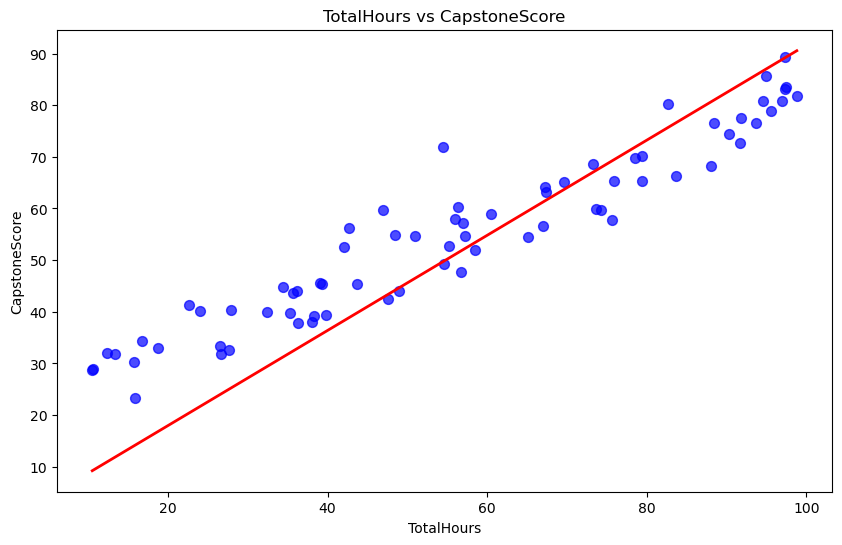

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.7 , color='blue', s=50)
plt.plot(x_interval, y_hat_interval, color='red', linewidth=2)
plt.xlabel('TotalHours')
plt.ylabel('CapstoneScore')
plt.title('TotalHours vs CapstoneScore')
plt.show()